## Project 3
This will analyze route data in supply chain with ML, and find the optimal route

In [24]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import folium
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import networkx as nx
import osmnx as ox
import numpy as np

In [10]:
# Load the dataset into a pandas dataframe
df = pd.read_csv('deliverytime.csv')

In [11]:
# Confirm the dataset
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [12]:
# Data cleaning: Drop unnecessary columns
df = df.drop(columns=['ID','Delivery_person_ID','Delivery_person_Age','Delivery_person_Ratings','Type_of_order','Type_of_vehicle'])

In [13]:
# Reconfirm data
df.head()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
0,22.745049,75.892471,22.765049,75.912471,24
1,12.913041,77.683237,13.043041,77.813237,33
2,12.914264,77.678400,12.924264,77.688400,26
3,11.003669,76.976494,11.053669,77.026494,21
4,12.972793,80.249982,13.012793,80.289982,30


In [14]:
# Rename column names
df = df.rename(columns={'Restaurant_latitude':'start_lon' ,'Restaurant_longitude': 'start_lat', 'Delivery_location_latitude':'end_lon','Delivery_location_longitude':'end_lat','Time_taken(min)':'travel_time'})

# Display df
df.head()

,start_lon,start_lat,end_lon,end_lat,travel_time
0,22.745049,75.892471,22.765049,75.912471,24
1,12.913041,77.683237,13.043041,77.813237,33
2,12.914264,77.678400,12.924264,77.688400,26
3,11.003669,76.976494,11.053669,77.026494,21
4,12.972793,80.249982,13.012793,80.289982,30


## Run Machine Learning Model

In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['start_lon', 'start_lat', 'end_lon', 'end_lat']], df['travel_time'], test_size=0.2)

# Create a Random Forest regressor model
rf = RandomForestRegressor()

# Train the model on the training set
rf.fit(X_train, y_train)

RandomForestRegressor()

In [20]:
# Use the trained model to make predictions on the testing set
y_pred = rf.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")

Mean squared error: 86.58


## Show locations in the map

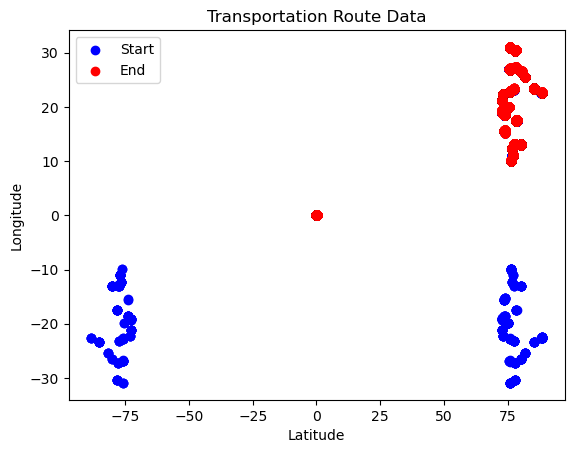

In [22]:
# Create a scatter plot of the starting and ending latitude and longitude coordinates
plt.scatter(df['start_lat'], df['start_lon'], color='blue', label='Start')
plt.scatter(df['end_lat'], df['end_lon'], color='red', label='End')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Transportation Route Data')
plt.legend()
plt.show()

In [ ]:
# Create a map centered on the first data point
map_center = (df.loc[0, 'start_lat'], df.loc[0, 'start_lon'])
m = folium.Map(location=map_center, zoom_start=10)

# Add markers for the starting and ending points of each route
for _, row in df.iterrows():
    start_point = (row['start_lat'], row['start_lon'])
    end_point = (row['end_lat'], row['end_lon'])
    folium.Marker(start_point).add_to(m)
    folium.Marker(end_point).add_to(m)

# Display the map
m